# CookBook

In [ ]:
import numpy as np

from pylatex import Section, Subsection, Tabular, Math, TikZ, Axis, \
    Plot, Figure, Matrix, Alignat, NoEscape
from pylatex.utils import italic
import os
from latexdocs import Document, Image

doc = Document(title='LaTeXDocs CookBook', author='Bence Balogh', date=True)

## Graphs

In [1]:
from latexdocs import TikZFigure
                                             
fig = TikZFigure(plot_options='height=4cm, width=6cm, grid=major')
fig.append(Plot(name='model', func='-x^5 - 242'))
coordinates = [
    (-4.77778, 2027.60977),
    (-3.55556, 347.84069),
    (-2.33333, 22.58953),
    (-1.11111, -493.50066),
    (0.11111, 46.66082),
    (1.33333, -205.56286),
    (2.55556, -341.40638),
    (3.77778, -1169.24780),
    (5.00000, -3269.56775),
]
fig.append(Plot(name='estimate', coordinates=coordinates))
#doc['Another section']['Beautiful graphs']['figure:fig1'] = fig
doc['Charts', 'TikZ'].append(fig)


## 2d Triangulations

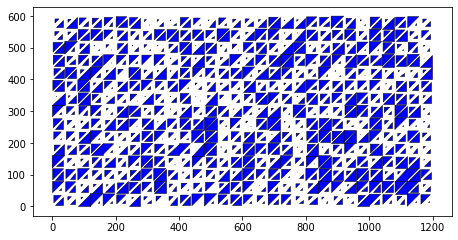

In [2]:
from sigmaepsilon.mesh.grid import grid
from sigmaepsilon.mesh.topo.tr import Q4_to_T3
from sigmaepsilon.mesh.tri.trimesh import triangulate
from sigmaepsilon.mesh.tri.triplot import triplot
import matplotlib.pyplot as plt
import numpy as np

gridparams = {
    'size' : (1200, 600),
    'shape' : (30, 15),
    'eshape' : (2, 2),
    'origo' : (0, 0),
    'start' : 0
}
coordsQ4, topoQ4 = grid(**gridparams)
points, triangles = Q4_to_T3(coordsQ4, topoQ4, path='grid')
triobj = triangulate(points=points[:, :2], triangles=triangles)[-1]
data = np.random.rand(len(triangles))

fig2d, ax = plt.subplots(figsize=(7.5, 4))
triplot(triobj, hinton=True, fig=fig2d, ax=ax, data=data)
plt.savefig("hinton_1.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{hinton_1.pdf}}
\caption{A triangular Hinton plot.}
\end{figure}  
"""
doc['Triangulations','Hinton plots'].append(NoEscape(content))

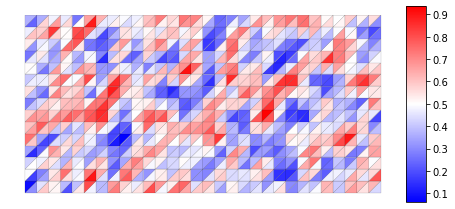

In [3]:
fig2d, ax = plt.subplots(figsize=(7.5, 4))
data = np.random.rand(len(points))
triplot(triobj, data=data, cmap='bwr', axis='off', fig=fig2d, ax=ax)
plt.savefig("hinton_2.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{hinton_2.pdf}}
\caption{A triangular Hinton plot.}
\end{figure}  
"""
doc['Triangulations','Hinton plots'].append(NoEscape(content))

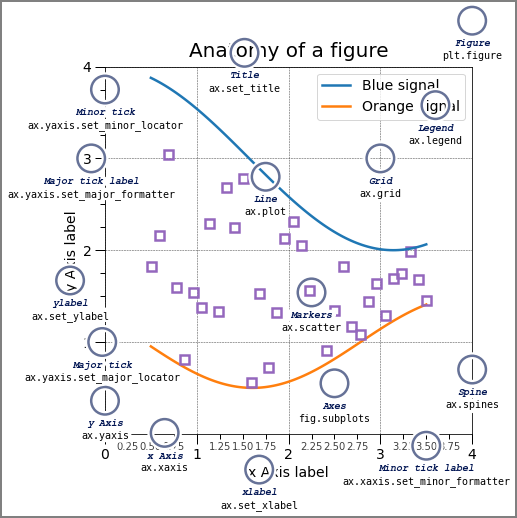

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='Courier New',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')

plt.savefig("mpl_anatomy.pdf")

content = r"""
\begin{figure}[htp] \centering{
\includegraphics[scale=1.0]{mpl_anatomy.pdf}}
\caption{The anatomy of a matplotlib figure.}
\end{figure}  
"""
doc['Matplotlib'].append(NoEscape(content))

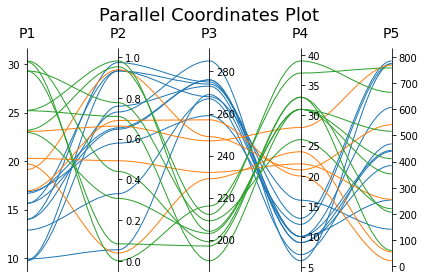

In [10]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np

fig, host = plt.subplots()

# create some dummy data
ynames = ['P1', 'P2', 'P3', 'P4', 'P5']
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
y1 = np.random.uniform(0, 10, N) + 7 * category
y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
y3 = np.random.binomial(300, 1 - category / 10, N)
y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
y5 = np.random.uniform(0, 800, N)

# organize the data
ys = np.dstack([y1, y2, y3, y4, y5])[0]
ymins = ys.min(axis=0)
ymaxs = ys.max(axis=0)
dys = ymaxs - ymins
ymins -= dys * 0.05  # add 5% padding below and above
ymaxs += dys * 0.05
dys = ymaxs - ymins

# transform all data to be compatible with the main axis
zs = np.zeros_like(ys)
zs[:, 0] = ys[:, 0]
zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
for i, ax in enumerate(axes):
    ax.set_ylim(ymins[i], ymaxs[i])
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    if ax != host:
        ax.spines['left'].set_visible(False)
        ax.yaxis.set_ticks_position('right')
        ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

host.set_xlim(0, ys.shape[1] - 1)
host.set_xticks(range(ys.shape[1]))
host.set_xticklabels(ynames, fontsize=14)
host.tick_params(axis='x', which='major', pad=7)
host.spines['right'].set_visible(False)
host.xaxis.tick_top()
host.set_title('Parallel Coordinates Plot', fontsize=18)

colors = plt.cm.tab10.colors
for j in range(N):
    # to just draw straight lines between the axes:
    # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

    # create bezier curves
    # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
    #   at one third towards the next axis; the first and last axis have one less control vertex
    # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
    # y-coordinate: repeat every point three times, except the first and last only twice
    verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                     np.repeat(zs[j, :], 3)[1:-1]))
    # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
    codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[category[j] - 1])
    host.add_patch(patch)
plt.tight_layout()
plt.show()

## Tables

In [5]:
from latexdocs import Table, TableX

labels = ['A', 'B', 'C', 'D']
data = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

doc['Tables'].append(Table(data=data, labels=labels))
doc['Tables'].append(TableX(data=data, labels=labels, table_spec=r"X|X|X|X"))


In [ ]:
from latexdocs import Image
import qrcode

qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data("https://github.com/dewloosh/latexdocs")
qr.make(fit=True)

img = qr.make_image(fill_color="black", back_color="white")
img.save("qrcode.png")

img = Image(filename="qrcode.png", position='h!',
            caption=None, width='350px')
#doc['image:img1'] = img
# doc.append(img)
# doc['image:img1'].append(NewPage())

In [6]:
doc.build().generate_pdf('cookbook', clean_tex=False, compiler='pdfLaTeX')

## Custom Images

In [ ]:
#plt.savefig("axisvm_UZ.pdf")

content = r"""
\begin{figure}[H] \centering{
\includegraphics[scale=1.0]{axisvm_UZ.pdf}}
\caption{Degree of Freedom Solution}
\end{figure}  
"""
#doc['Results', 'ULS', 'Cases'].append(NoEscape(content))